## This project aims to classify the emotion on the person's face. there are seven types emotions: Happy, Sad, Disgust, angry, neutral, 
## Fear and Surprise. this model is trained with three machine learning models: Logistic Regression, Support Vector Machine and Random Forest and 
## these models combined with voting classifier. 
## the dataset is used for this project is given following link:
## https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset
## However, all the images are not used for this folder because the size of the dataset.
## the following libraries are used for this project:
## NumPy, Scikit Learn, OpenCV, Pandas, Matplotlib and Pickle and jupyter notebook is used in a local machine. there are screenshots are available in a screenshot folder.



In [2]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array
import os
import pickle
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


## the following models are used to detect the human face from any image. these are models are pre-trained models from third parties. these models can be downloaded from the following link:
## https://www.oreilly.com/library/view/learning-opencv-4/9781789531619/cf2b66a8-9121-4070-8b22-58cf64d4c5be.xhtml

In [3]:
face_detection_model = "./models/res10_300x300_ssd_iter_140000.caffemodel"
face_detection_proto = "./models/deploy.prototxt.txt"
face_descriptor = "./models/openface.nn4.small2.v1.t7"
detector_model = cv2.dnn.readNetFromCaffe(face_detection_proto, face_detection_model)
descriptor_model = cv2.dnn.readNetFromTorch(face_descriptor)

## the following method is used to detect the face from the images in the datset and extract the features for emotion detection.

In [4]:
def Feature_Extraction_Function(image_path):
    img = cv2.imread(image_path)
    
    image = img.copy()
    h,w = image.shape[:2]
    img_blob = cv2.dnn.blobFromImage(image,1,(300,300),(104,177,123),swapRB=False,crop=False)
  
    detector_model.setInput(img_blob)
    detections = detector_model.forward()

    if len(detections) > 0:
        i = np.argmax(detections[0,0,:,2])# consider the face with max confidence score
        confidence = detections[0,0,i,2]
        if confidence > 0.5:
            box = detections[0,0,i,3:7]*np.array([w,h,w,h])
            (startx,starty,endx,endy) = box.astype('int')
            
            roi = image[starty:endy,startx:endx].copy()
            
            faceblob = cv2.dnn.blobFromImage(roi,1/255,(96,96),(0,0,0),swapRB=True,crop=True)
            descriptor_model.setInput(faceblob)
            vectors = descriptor_model.forward()
            
            return vectors
    return None
    

In [7]:
folders = os.listdir("Dataset")
folders

['happy', 'sad', 'fear', 'surprise', 'neutral', 'angry', 'disgust']

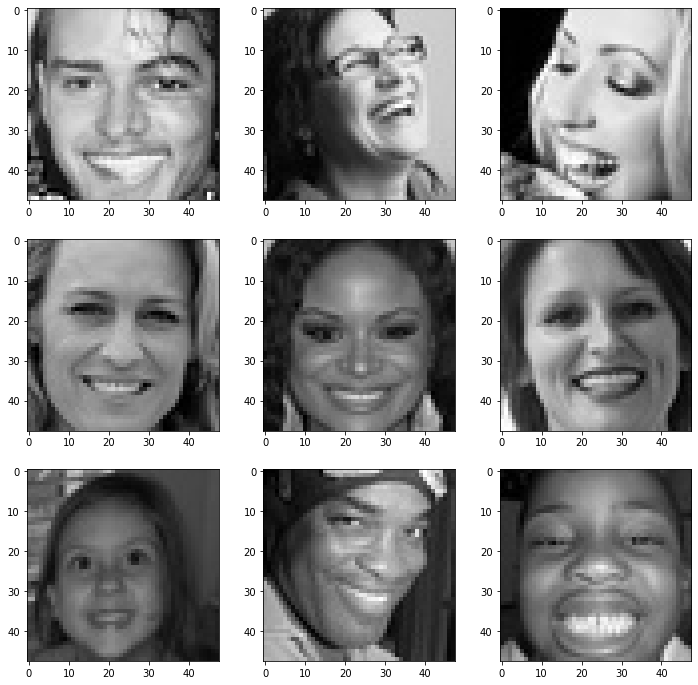

In [8]:
picture_size = 48
expression = 'happy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img("Dataset/"+expression+"/"+
                  os.listdir("Dataset/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

In [9]:
data = dict(data=[],label=[])

In [10]:
# extracting the features from the imsges
for folder in folders:
    filenames = os.listdir('Dataset/{}'.format(folder))
#     print(filenames)
    for filename in filenames:
        try:
            vector = Feature_Extraction_Function('./dataset/{}/{}'.format(folder,filename))
            if vector is not None:
                data['data'].append(vector)
                data['label'].append(folder)
                print('Extracting the feaures succesfully')
                
        except:
            pass

Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaur

Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaur

Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaur

Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaur

Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaur

Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaures succesfully
Extracting the feaur

In [11]:
#  labelling the names of the emotion the images in the dataset
print(data["label"])

['happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 'happy', 

In [12]:
# calculating the distribution
pd.Series(data['label']).value_counts()

neutral     292
sad         260
happy       244
fear        207
angry       189
surprise    181
disgust      40
dtype: int64

In [13]:
# saving the feature extraction in a pickle file in a models folder to train the machine learning model.
pickle.dump(data,open('models/emotion_features.pickle',mode='wb'))

In [14]:
#  loading the model from the saved pickle file.
data = pickle.load(open('models/emotion_features.pickle',mode='rb')) 

In [16]:
x = np.array(data['data'])
y = np.array(data['label'])

In [17]:
x.shape, y.shape

((1413, 1, 128), (1413,))

In [18]:
x = x.reshape(-1, 128)
x.shape

(1413, 128)

In [19]:
#  divide the data into 80% training and 20
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=0)

In [20]:
x_train.shape, x_test.shape

((1130, 128), (283, 128))

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

In [22]:
model_logistic = LogisticRegression()
model_logistic.fit(x_train,y_train)

LogisticRegression()

## Logistic Regression.
## the accuracy is only 29%, which is very low, beacause amount of data is used foe this project and it is hard to train this kind of data

In [23]:
def get_report(model, x_train,y_train,x_test,y_test):
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # accuracy score
    acc_train = accuracy_score(y_train,y_pred_train)
    acc_test = accuracy_score(y_test,y_pred_test)

    # f1 score
    f1_score_train = f1_score(y_train,y_pred_train,average='macro')
    f1_score_test = f1_score(y_test,y_pred_test,average='macro')


    print('Accuracy Train = %0.2f'%acc_train)
    print('Accuracy Test = %0.2f'%acc_test)
    print('F1 Score Train = %0.2f'%f1_score_train)
    print('F1 Score Test = %0.2f'%f1_score_test)

get_report(model_logistic,x_train,y_train,x_test,y_test)

Accuracy Train = 0.29
Accuracy Test = 0.30
F1 Score Train = 0.23
F1 Score Test = 0.23


## Support Vector Machine with 42% accuracy.

In [24]:
model_svc = SVC(probability=True)
model_svc.fit(x_train,y_train)
get_report(model_svc,x_train,y_train,x_test,y_test)

Accuracy Train = 0.42
Accuracy Test = 0.32
F1 Score Train = 0.33
F1 Score Test = 0.22


## Random Forest with 100 % accuracy. 
## this model is highly overfit

In [25]:
model_rf = RandomForestClassifier(n_estimators=10,)
model_rf.fit(x_train,y_train)
get_report(model_rf,x_train,y_train,x_test,y_test)

Accuracy Train = 0.99
Accuracy Test = 0.42
F1 Score Train = 1.00
F1 Score Test = 0.44


## A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.
## Soft Voting: In soft voting, the output class is the prediction based on the average of probability given to that class.

In [26]:
model_voting = VotingClassifier(estimators=[
    ('logistic',LogisticRegression()),
    ('svm',SVC(probability=True)),
    ('rf',RandomForestClassifier())
], voting='soft',weights=[2,3,1])
model_voting.fit(x_train,y_train)


VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('svm', SVC(probability=True)),
                             ('rf', RandomForestClassifier())],
                 voting='soft', weights=[2, 3, 1])

In [27]:
get_report(model_voting,x_train,y_train,x_test,y_test)

Accuracy Train = 0.88
Accuracy Test = 0.44
F1 Score Train = 0.88
F1 Score Test = 0.42


In [28]:
from sklearn.model_selection import GridSearchCV
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [29]:
model_grid = GridSearchCV(model_voting,
                         param_grid={
                             'svm__C':[3,5,7,10],
                             'svm__gamma':[0.1,0.3,0.5],
                             'rf__n_estimators':[5,10,20],
                             'rf__max_depth':[3,5,7],
                             'voting':['soft','hard']
                         },scoring='accuracy',cv=3,n_jobs=1,verbose=2)

In [30]:
model_grid.fit(x_train,y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END rf__max_depth=3, rf__n_estimators=5, svm__C=3, svm__gamma=0.1, voting=soft; total time=   0.4s
[CV] END rf__max_depth=3, rf__n_estimators=5, svm__C=3, svm__gamma=0.1, voting=soft; total time=   0.4s
[CV] END rf__max_depth=3, rf__n_estimators=5, svm__C=3, svm__gamma=0.1, voting=soft; total time=   0.4s
[CV] END rf__max_depth=3, rf__n_estimators=5, svm__C=3, svm__gamma=0.1, voting=hard; total time=   0.4s
[CV] END rf__max_depth=3, rf__n_estimators=5, svm__C=3, svm__gamma=0.1, voting=hard; total time=   0.4s
[CV] END rf__max_depth=3, rf__n_estimators=5, svm__C=3, svm__gamma=0.1, voting=hard; total time=   0.4s
[CV] END rf__max_depth=3, rf__n_estimators=5, svm__C=3, svm__gamma=0.3, voting=soft; total time=   0.4s
[CV] END rf__max_depth=3, rf__n_estimators=5, svm__C=3, svm__gamma=0.3, voting=soft; total time=   0.4s
[CV] END rf__max_depth=3, rf__n_estimators=5, svm__C=3, svm__gamma=0.3, voting=soft; total time=   0.4s
[

[CV] END rf__max_depth=3, rf__n_estimators=10, svm__C=3, svm__gamma=0.3, voting=soft; total time=   0.4s
[CV] END rf__max_depth=3, rf__n_estimators=10, svm__C=3, svm__gamma=0.3, voting=soft; total time=   0.4s
[CV] END rf__max_depth=3, rf__n_estimators=10, svm__C=3, svm__gamma=0.3, voting=soft; total time=   0.5s
[CV] END rf__max_depth=3, rf__n_estimators=10, svm__C=3, svm__gamma=0.3, voting=hard; total time=   0.5s
[CV] END rf__max_depth=3, rf__n_estimators=10, svm__C=3, svm__gamma=0.3, voting=hard; total time=   0.4s
[CV] END rf__max_depth=3, rf__n_estimators=10, svm__C=3, svm__gamma=0.3, voting=hard; total time=   0.5s
[CV] END rf__max_depth=3, rf__n_estimators=10, svm__C=3, svm__gamma=0.5, voting=soft; total time=   0.5s
[CV] END rf__max_depth=3, rf__n_estimators=10, svm__C=3, svm__gamma=0.5, voting=soft; total time=   0.5s
[CV] END rf__max_depth=3, rf__n_estimators=10, svm__C=3, svm__gamma=0.5, voting=soft; total time=   0.5s
[CV] END rf__max_depth=3, rf__n_estimators=10, svm__C=3

[CV] END rf__max_depth=3, rf__n_estimators=20, svm__C=3, svm__gamma=0.5, voting=soft; total time=   0.6s
[CV] END rf__max_depth=3, rf__n_estimators=20, svm__C=3, svm__gamma=0.5, voting=soft; total time=   0.5s
[CV] END rf__max_depth=3, rf__n_estimators=20, svm__C=3, svm__gamma=0.5, voting=soft; total time=   0.6s
[CV] END rf__max_depth=3, rf__n_estimators=20, svm__C=3, svm__gamma=0.5, voting=hard; total time=   0.6s
[CV] END rf__max_depth=3, rf__n_estimators=20, svm__C=3, svm__gamma=0.5, voting=hard; total time=   0.6s
[CV] END rf__max_depth=3, rf__n_estimators=20, svm__C=3, svm__gamma=0.5, voting=hard; total time=   0.6s
[CV] END rf__max_depth=3, rf__n_estimators=20, svm__C=5, svm__gamma=0.1, voting=soft; total time=   0.5s
[CV] END rf__max_depth=3, rf__n_estimators=20, svm__C=5, svm__gamma=0.1, voting=soft; total time=   0.5s
[CV] END rf__max_depth=3, rf__n_estimators=20, svm__C=5, svm__gamma=0.1, voting=soft; total time=   0.6s
[CV] END rf__max_depth=3, rf__n_estimators=20, svm__C=5

[CV] END rf__max_depth=5, rf__n_estimators=5, svm__C=5, svm__gamma=0.1, voting=soft; total time=   0.5s
[CV] END rf__max_depth=5, rf__n_estimators=5, svm__C=5, svm__gamma=0.1, voting=soft; total time=   0.5s
[CV] END rf__max_depth=5, rf__n_estimators=5, svm__C=5, svm__gamma=0.1, voting=hard; total time=   0.5s
[CV] END rf__max_depth=5, rf__n_estimators=5, svm__C=5, svm__gamma=0.1, voting=hard; total time=   0.5s
[CV] END rf__max_depth=5, rf__n_estimators=5, svm__C=5, svm__gamma=0.1, voting=hard; total time=   0.5s
[CV] END rf__max_depth=5, rf__n_estimators=5, svm__C=5, svm__gamma=0.3, voting=soft; total time=   0.5s
[CV] END rf__max_depth=5, rf__n_estimators=5, svm__C=5, svm__gamma=0.3, voting=soft; total time=   0.6s
[CV] END rf__max_depth=5, rf__n_estimators=5, svm__C=5, svm__gamma=0.3, voting=soft; total time=   0.5s
[CV] END rf__max_depth=5, rf__n_estimators=5, svm__C=5, svm__gamma=0.3, voting=hard; total time=   0.5s
[CV] END rf__max_depth=5, rf__n_estimators=5, svm__C=5, svm__gam

[CV] END rf__max_depth=5, rf__n_estimators=10, svm__C=5, svm__gamma=0.3, voting=soft; total time=   1.9s
[CV] END rf__max_depth=5, rf__n_estimators=10, svm__C=5, svm__gamma=0.3, voting=hard; total time=   1.3s
[CV] END rf__max_depth=5, rf__n_estimators=10, svm__C=5, svm__gamma=0.3, voting=hard; total time=   1.1s
[CV] END rf__max_depth=5, rf__n_estimators=10, svm__C=5, svm__gamma=0.3, voting=hard; total time=   1.0s
[CV] END rf__max_depth=5, rf__n_estimators=10, svm__C=5, svm__gamma=0.5, voting=soft; total time=   0.9s
[CV] END rf__max_depth=5, rf__n_estimators=10, svm__C=5, svm__gamma=0.5, voting=soft; total time=   0.9s
[CV] END rf__max_depth=5, rf__n_estimators=10, svm__C=5, svm__gamma=0.5, voting=soft; total time=   0.9s
[CV] END rf__max_depth=5, rf__n_estimators=10, svm__C=5, svm__gamma=0.5, voting=hard; total time=   0.8s
[CV] END rf__max_depth=5, rf__n_estimators=10, svm__C=5, svm__gamma=0.5, voting=hard; total time=   0.8s
[CV] END rf__max_depth=5, rf__n_estimators=10, svm__C=5

[CV] END rf__max_depth=5, rf__n_estimators=20, svm__C=5, svm__gamma=0.5, voting=soft; total time=   0.7s
[CV] END rf__max_depth=5, rf__n_estimators=20, svm__C=5, svm__gamma=0.5, voting=hard; total time=   0.7s
[CV] END rf__max_depth=5, rf__n_estimators=20, svm__C=5, svm__gamma=0.5, voting=hard; total time=   0.7s
[CV] END rf__max_depth=5, rf__n_estimators=20, svm__C=5, svm__gamma=0.5, voting=hard; total time=   0.8s
[CV] END rf__max_depth=5, rf__n_estimators=20, svm__C=7, svm__gamma=0.1, voting=soft; total time=   0.7s
[CV] END rf__max_depth=5, rf__n_estimators=20, svm__C=7, svm__gamma=0.1, voting=soft; total time=   0.7s
[CV] END rf__max_depth=5, rf__n_estimators=20, svm__C=7, svm__gamma=0.1, voting=soft; total time=   0.7s
[CV] END rf__max_depth=5, rf__n_estimators=20, svm__C=7, svm__gamma=0.1, voting=hard; total time=   0.7s
[CV] END rf__max_depth=5, rf__n_estimators=20, svm__C=7, svm__gamma=0.1, voting=hard; total time=   0.7s
[CV] END rf__max_depth=5, rf__n_estimators=20, svm__C=7

[CV] END rf__max_depth=7, rf__n_estimators=5, svm__C=7, svm__gamma=0.1, voting=hard; total time=   0.6s
[CV] END rf__max_depth=7, rf__n_estimators=5, svm__C=7, svm__gamma=0.1, voting=hard; total time=   0.6s
[CV] END rf__max_depth=7, rf__n_estimators=5, svm__C=7, svm__gamma=0.1, voting=hard; total time=   0.6s
[CV] END rf__max_depth=7, rf__n_estimators=5, svm__C=7, svm__gamma=0.3, voting=soft; total time=   0.6s
[CV] END rf__max_depth=7, rf__n_estimators=5, svm__C=7, svm__gamma=0.3, voting=soft; total time=   0.5s
[CV] END rf__max_depth=7, rf__n_estimators=5, svm__C=7, svm__gamma=0.3, voting=soft; total time=   0.5s
[CV] END rf__max_depth=7, rf__n_estimators=5, svm__C=7, svm__gamma=0.3, voting=hard; total time=   0.6s
[CV] END rf__max_depth=7, rf__n_estimators=5, svm__C=7, svm__gamma=0.3, voting=hard; total time=   0.6s
[CV] END rf__max_depth=7, rf__n_estimators=5, svm__C=7, svm__gamma=0.3, voting=hard; total time=   0.6s
[CV] END rf__max_depth=7, rf__n_estimators=5, svm__C=7, svm__gam

[CV] END rf__max_depth=7, rf__n_estimators=10, svm__C=7, svm__gamma=0.3, voting=hard; total time=   0.6s
[CV] END rf__max_depth=7, rf__n_estimators=10, svm__C=7, svm__gamma=0.3, voting=hard; total time=   0.6s
[CV] END rf__max_depth=7, rf__n_estimators=10, svm__C=7, svm__gamma=0.5, voting=soft; total time=   0.7s
[CV] END rf__max_depth=7, rf__n_estimators=10, svm__C=7, svm__gamma=0.5, voting=soft; total time=   0.7s
[CV] END rf__max_depth=7, rf__n_estimators=10, svm__C=7, svm__gamma=0.5, voting=soft; total time=   0.8s
[CV] END rf__max_depth=7, rf__n_estimators=10, svm__C=7, svm__gamma=0.5, voting=hard; total time=   0.7s
[CV] END rf__max_depth=7, rf__n_estimators=10, svm__C=7, svm__gamma=0.5, voting=hard; total time=   0.7s
[CV] END rf__max_depth=7, rf__n_estimators=10, svm__C=7, svm__gamma=0.5, voting=hard; total time=   0.7s
[CV] END rf__max_depth=7, rf__n_estimators=10, svm__C=10, svm__gamma=0.1, voting=soft; total time=   0.6s
[CV] END rf__max_depth=7, rf__n_estimators=10, svm__C=

[CV] END rf__max_depth=7, rf__n_estimators=20, svm__C=7, svm__gamma=0.5, voting=hard; total time=   0.6s
[CV] END rf__max_depth=7, rf__n_estimators=20, svm__C=7, svm__gamma=0.5, voting=hard; total time=   0.6s
[CV] END rf__max_depth=7, rf__n_estimators=20, svm__C=10, svm__gamma=0.1, voting=soft; total time=   0.6s
[CV] END rf__max_depth=7, rf__n_estimators=20, svm__C=10, svm__gamma=0.1, voting=soft; total time=   0.6s
[CV] END rf__max_depth=7, rf__n_estimators=20, svm__C=10, svm__gamma=0.1, voting=soft; total time=   0.6s
[CV] END rf__max_depth=7, rf__n_estimators=20, svm__C=10, svm__gamma=0.1, voting=hard; total time=   0.6s
[CV] END rf__max_depth=7, rf__n_estimators=20, svm__C=10, svm__gamma=0.1, voting=hard; total time=   0.6s
[CV] END rf__max_depth=7, rf__n_estimators=20, svm__C=10, svm__gamma=0.1, voting=hard; total time=   0.6s
[CV] END rf__max_depth=7, rf__n_estimators=20, svm__C=10, svm__gamma=0.3, voting=soft; total time=   0.6s
[CV] END rf__max_depth=7, rf__n_estimators=20, s

GridSearchCV(cv=3,
             estimator=VotingClassifier(estimators=[('logistic',
                                                     LogisticRegression()),
                                                    ('svm',
                                                     SVC(probability=True)),
                                                    ('rf',
                                                     RandomForestClassifier())],
                                        voting='soft', weights=[2, 3, 1]),
             n_jobs=1,
             param_grid={'rf__max_depth': [3, 5, 7],
                         'rf__n_estimators': [5, 10, 20],
                         'svm__C': [3, 5, 7, 10], 'svm__gamma': [0.1, 0.3, 0.5],
                         'voting': ['soft', 'hard']},
             scoring='accuracy', verbose=2)

In [34]:
model_best_estimator = model_grid.best_estimator_

In [35]:
print('Accuracy = %0.2f'%model_grid.best_score_)

Accuracy = 0.29


## the accuracy is only 29% which is expected from this dataset

In [36]:
# save model in pickle file in models folder
pickle.dump(model_best_estimator,open('./models/emotion_detection.pkl',mode='wb'))

## Conclusion
## this project sucessfully detected the face from the images and also successfuly detected the emotions around the faces.
## the accuracy was very low for the project, but this accuracy was expected because of the small dataset. more accuracy can be achieved by adding more images with emotions in the dataset. which required more space and power in the machine. this project was still accurately achieved the results from the test image image.